In [186]:
import pandas as pd
import numpy as np
from datetime import datetime

# Set max column and rows
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

#Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

# Import visualisation libraries
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns


# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as darkgrid.
sns.set_style('darkgrid')

## Finding total cycle counts for Inner and Outer London

In [222]:
# Importing files
london_inner = pd.read_csv('/Users/shin/desktop/lse_daca/final_project/data/London/london_inner_cl.csv') 
london_outer = pd.read_csv('/Users/shin/desktop/lse_daca/final_project/data/London/london_outer_cl.csv') 
london_sites = pd.read_csv('/Users/shin/desktop/lse_daca/final_project/data/London/london_sites_cl.csv')

# Subset the Inner London data from 2017-2019 timeframe.
inner_lc = london_inner.loc[(london_inner['Year'] >= 2017) & (london_inner['Year'] <= 2019)]
# Subset the Outer London data from 2017-2019 timeframe.
outer_lc = london_outer.loc[(london_outer['Survey wave (year)'] >= 2017) & (london_outer['Survey wave (year)'] <= 2019)]

# renaming columns to have a unique identifier for both datasets. 
london_sites = london_sites.rename(columns={'UnqID': 'Site ID'})



In [223]:
# Merge the subset with the information by borough.
inner_sites = pd.merge(inner_lc,
                 london_sites[['Site ID','Borough', 'Functional cycling area']],
                 on='Site ID', how='left')

outer_sites = pd.merge(outer_lc,
                 london_sites[['Site ID','Borough', 'Functional cycling area']],
                 on='Site ID', how='left')


In [224]:
outer_sites.head(2)

,Unnamed: 0,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles,Date,Day,Month,Quarter,Borough,Functional cycling area
0,115456,2017,OUTCY001,High Road Leyton,"mer, 07/06/17",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,0,0,0,0,2017-06-07,Wednesday,June,Q2,Waltham Forest,Outer
1,115457,2017,OUTCY001,High Road Leyton,"mer, 07/06/17",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,1,0,0,1,2017-06-07,Wednesday,June,Q2,Waltham Forest,Outer


In [225]:
inner_sites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229376 entries, 0 to 229375
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  229376 non-null  int64  
 1   Survey wave (year)          229376 non-null  int64  
 2   Site ID                     229376 non-null  object 
 3   Location                    229376 non-null  object 
 4   Survey date                 227264 non-null  object 
 5   Weather                     229376 non-null  object 
 6   Time                        229376 non-null  object 
 7   Period                      229376 non-null  object 
 8   Direction                   229376 non-null  object 
 9   Start hour                  229376 non-null  float64
 10  Start minute                229376 non-null  float64
 11  Number of private cycles    229376 non-null  int64  
 12  Number of cycle hire bikes  229376 non-null  int64  
 13  Total cycles  

In [226]:
outer_sites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173056 entries, 0 to 173055
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Unnamed: 0                173056 non-null  int64 
 1   Survey wave (year)        173056 non-null  int64 
 2   Site ID                   173056 non-null  object
 3   Location                  173056 non-null  object
 4   Survey date               172656 non-null  object
 5   Weather                   173056 non-null  object
 6   Time                      173056 non-null  object
 7   Period                    173056 non-null  object
 8   Direction                 173056 non-null  object
 9   Start hour                173056 non-null  int64 
 10  Start minute              173056 non-null  int64 
 11  Number of male cycles     173056 non-null  int64 
 12  Number of female cycles   173056 non-null  int64 
 13  Number of unknown cycles  173056 non-null  int64 
 14  Tota

In [227]:
# Determine total cycles count by inner london boroughs.
inner_cycle_count = inner_sites.groupby(['Borough', 'Year'])['Total cycles'].sum().\
                        reset_index().sort_values(by=['Borough', 'Year','Total cycles'])

# renaming column headers
inner_cycle_count.rename(columns = {'Year':'year',
                                   'Borough':'borough'}, inplace = True)

# changing column type for visualisation purposes
inner_cycle_count["year"]=group_cycle_count["year"].apply(str)

inner_cycle_count.head()

,borough,year,Total cycles
0,Brent,2017,1030
1,Brent,2018,1025
2,Brent,2019,1049
3,Bromley,2017,188
4,Bromley,2018,150


In [228]:
# Determine total cycles count by outer london boroughs.
outer_cycle_count = outer_sites.groupby(['Borough', 'Survey wave (year)'])['Total cycles'].sum().\
                        reset_index().sort_values(by=['Borough', 'Survey wave (year)','Total cycles'])

# renaming column headers
outer_cycle_count.rename(columns = {'Survey wave (year)':'year',
                                   'Borough':'borough'}, inplace = True)

# changing column type for visualisation purposes
outer_cycle_count["year"]=outer_cycle_count["year"].apply(str)

outer_cycle_count.head()

,borough,year,Total cycles
0,Barking & Dagenham,2017,1186
1,Barking & Dagenham,2018,1368
2,Barking & Dagenham,2019,1111
3,Barnet,2017,2633
4,Barnet,2018,2546


## Finding the number of accidents in each borough

In [229]:

accidents = pd.read_csv('/Users/shin/desktop/lse_daca/final_project/accidents/accidents.csv')
accidents.head()

,id,lat,lon,location,date,time,area,borough,mode,year
0,345908,51.514951,-0.072747,On Whitechapel High Street Near The Junction W...,2019-01-02,18:45:00,Inner,Tower Hamlets,PedalCycle,2019
1,345914,51.475380,-0.395505,On Great west Road Near The Junction With Grea...,2019-01-03,06:45:00,Outer,Hounslow,PedalCycle,2019
2,345915,51.465106,-0.248171,On Upper Richmond Road Near The Junction With ...,2019-01-03,12:30:00,Outer,Richmond upon Thames,PedalCycle,2019
3,345916,51.506781,-0.128527,On The Mall 50 metres west of The Junction Wit...,2019-01-03,10:45:00,Inner,Westminster,PedalCycle,2019
4,345923,51.481538,-0.026456,On New King Street Near The Junction With Evel...,2019-01-03,17:00:00,Inner,Lewisham,PedalCycle,2019


In [230]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26455 entries, 0 to 26454
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        26455 non-null  int64  
 1   lat       26455 non-null  float64
 2   lon       26455 non-null  float64
 3   location  26455 non-null  object 
 4   date      26455 non-null  object 
 5   time      26455 non-null  object 
 6   area      26455 non-null  object 
 7   borough   26455 non-null  object 
 8   mode      26455 non-null  object 
 9   year      26455 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 2.0+ MB


In [231]:
# changing the year column into categorical for visualisation purposes.
accidents['year'] = accidents['year'].astype(str)
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26455 entries, 0 to 26454
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        26455 non-null  int64  
 1   lat       26455 non-null  float64
 2   lon       26455 non-null  float64
 3   location  26455 non-null  object 
 4   date      26455 non-null  object 
 5   time      26455 non-null  object 
 6   area      26455 non-null  object 
 7   borough   26455 non-null  object 
 8   mode      26455 non-null  object 
 9   year      26455 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.0+ MB


In [232]:
# renaming column header for clarity
accidents.rename(columns = {'mode': 'total_accidents'}, inplace = True)

In [233]:
# Finding the number of pedalcycle accidents in each borough and year.
accidents_count = accidents.groupby(['year','borough', 'area'])[['total_accidents']].count().reset_index()
accidents_count.head()

,year,borough,area,total_accidents
0,2017,Barking & Dagenham,Outer,82
1,2017,Barnet,Outer,118
2,2017,Bexley,Outer,36
3,2017,Brent,Outer,170
4,2017,Bromley,Outer,184


In [234]:
# merging inner london total cycle counts and inner london accident total counts
accidents_totalcycle_inner = pd.merge(inner_cycle_count, accidents_count, on=['borough','year'], how='left')


accidents_totalcycle_inner.head()

,borough,year,Total cycles,area,total_accidents
0,Brent,2017,1030,Outer,170.0
1,Brent,2018,1025,Outer,164.0
2,Brent,2019,1049,Outer,152.0
3,Bromley,2017,188,Outer,184.0
4,Bromley,2018,150,Outer,162.0


In [254]:
accidents_totalcycle_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   borough          63 non-null     object 
 1   year             24 non-null     object 
 2   Total cycles     63 non-null     int64  
 3   area             24 non-null     object 
 4   total_accidents  24 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.0+ KB


In [250]:
# checking for null values
accidents_totalcycle_inner.total_accidents.isnull().sum()

39

In [253]:
accidents_totalcycle_inner_cl = accidents_totalcycle_inner.dropna()
accidents_totalcycle_inner_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   borough          24 non-null     object 
 1   year             24 non-null     object 
 2   Total cycles     24 non-null     int64  
 3   area             24 non-null     object 
 4   total_accidents  24 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.1+ KB


In [235]:
# merging inner london total cycle counts and inner london accident total counts
accidents_totalcycle_outer = pd.merge(outer_cycle_count, accidents_count, on=['borough','year'], how='left')

accidents_totalcycle_outer.head()

,borough,year,Total cycles,area,total_accidents
0,Barking & Dagenham,2017,1186,Outer,82
1,Barking & Dagenham,2018,1368,Outer,82
2,Barking & Dagenham,2019,1111,Outer,114
3,Barnet,2017,2633,Outer,118
4,Barnet,2018,2546,Outer,151


In [256]:
# checking for null values
accidents_totalcycle_outer.total_accidents.isnull().sum()

0

## Visualising the results

In [260]:
# df = accidents_count[accidents_count['area'] == 'Inner']

df = accidents_totalcycle_inner_cl

fig = px.bar(df,
             x="borough",
             y="total_accidents",
             color="year",
             labels={"borough": "Borough",
                     "total_accidents": "Number of accidents"},
             title="Cyclist accidents in Inner London from 2017 to 2019")
fig.show()

In [259]:
df1 = accidents_totalcycle_outer

fig = px.bar(df1,
             x="borough",
             y="total_accidents",
             color="year",
             labels={"borough": "Borough",
                     "total_accidents": "Number of accidents"},
             title="Cyclist accidents in Outer London from 2017 to 2019")
fig.show()

In [267]:
# Inner london total cycles vs accidents
fig = px.scatter(accidents_totalcycle_inner_cl,
                 x='Total cycles',
                 y='total_accidents',
                 color='year',
                 labels={"Total cycles": "Number of cycles",
                         "total_accidents": "Number of accidents"},
                 title="Relationship between cycling and accidents in Inner London from 2017 to 2019")
fig.show()

In [266]:
# Outer london total cycles vs accidents
fig = px.scatter(accidents_totalcycle_outer,
                 x='Total cycles',
                 y='total_accidents',
                 color='year',
                 labels={"Total cycles": "Number of cycles",
                         "total_accidents": "Number of accidents"},
                 title="Relationship between cycling and accidents in Outer London from 2017 to 2019")
fig.show()


There is a plausible positive relationship that the number of accidents increases as the number of cycles increases in both Inner and Outer London. There are relatively minimal changes over the years in terms of this relationship. More could be done to reduce the number of accidents as we move forward to increase the number of cycles in the future. Next, we look how these accidents are reported to TFL to gain some insights into some causes of the accidents.

In [30]:
## creating a word cloud to visualise the most common location that have frequent accidents in london
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
# Import the class.
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to /Users/shin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
# Transform data to lowercase.
accidents['location'] = accidents['location'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
accidents['location'].head()

0    on whitechapel high street near the junction w...
1    on great west road near the junction with grea...
2    on upper richmond road near the junction with ...
3    on the mall 50 metres west of the junction wit...
4    on new king street near the junction with evel...
Name: location, dtype: object

In [32]:
# Remove punctuation.
accidents['location'] = accidents['location'].str.replace('[^\w\s]','')

# Preview the result.
accidents['location'].head()

0    on whitechapel high street near the junction w...
1    on great west road near the junction with grea...
2    on upper richmond road near the junction with ...
3    on the mall 50 metres west of the junction wit...
4    on new king street near the junction with evel...
Name: location, dtype: object

In [33]:
# Check the number of duplicate values in the COMMENTS column.
accidents.location.duplicated().sum()

14330

In [34]:
# Drop duplicates.
accidents_data = accidents.drop_duplicates(subset=['location'])

# Preview data.
accidents_data.reset_index(inplace=True)
accidents_data.head()

,index,id,lat,lon,location,date,time,area,borough,mode,year
0,0,345908,51.514951,-0.072747,on whitechapel high street near the junction w...,2019-01-02,18:45:00,Inner,Tower Hamlets,PedalCycle,2019
1,1,345914,51.475380,-0.395505,on great west road near the junction with grea...,2019-01-03,06:45:00,Outer,Hounslow,PedalCycle,2019
2,2,345915,51.465106,-0.248171,on upper richmond road near the junction with ...,2019-01-03,12:30:00,Outer,Richmond upon Thames,PedalCycle,2019
3,3,345916,51.506781,-0.128527,on the mall 50 metres west of the junction wit...,2019-01-03,10:45:00,Inner,Westminster,PedalCycle,2019
4,4,345923,51.481538,-0.026456,on new king street near the junction with evel...,2019-01-03,17:00:00,Inner,Lewisham,PedalCycle,2019


In [35]:
# String all the comments together in a single variable.
# Create an empty string variable.
all_location = ''
for i in range(accidents_data.shape[0]):
    # Add each location.
    all_location = all_location + accidents_data['location'][i]

In [36]:
all_location

'on whitechapel high street near the junction with old castle streon great west road near the junction with great south west road north ofon upper richmond road near the junction with priory laneon the mall 50 metres west of the junction with spring gardenson new king street near the junction with evelyn streeton stanley avenue near the junction with whalebone lane southon kingston road london sw19 near the junction with church laneon kingston bypass 200 metres north of the junction with coombe lon campbell road near the junction with bow road londonon eardley road near the junction with mitcham laneon crowndale road nw1 58 metres east of the junction with camdenon kensington road 20 metres west of the junction with palace avenueon kings road near the junction with oakly streeton hove gardens near the junction with naon warren road near the junction with windsor driveon horn lane 20 metres north of the junction with shalimar gardenon lavender sweep near the junction with lavender hillo

In [37]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900,
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_location) 

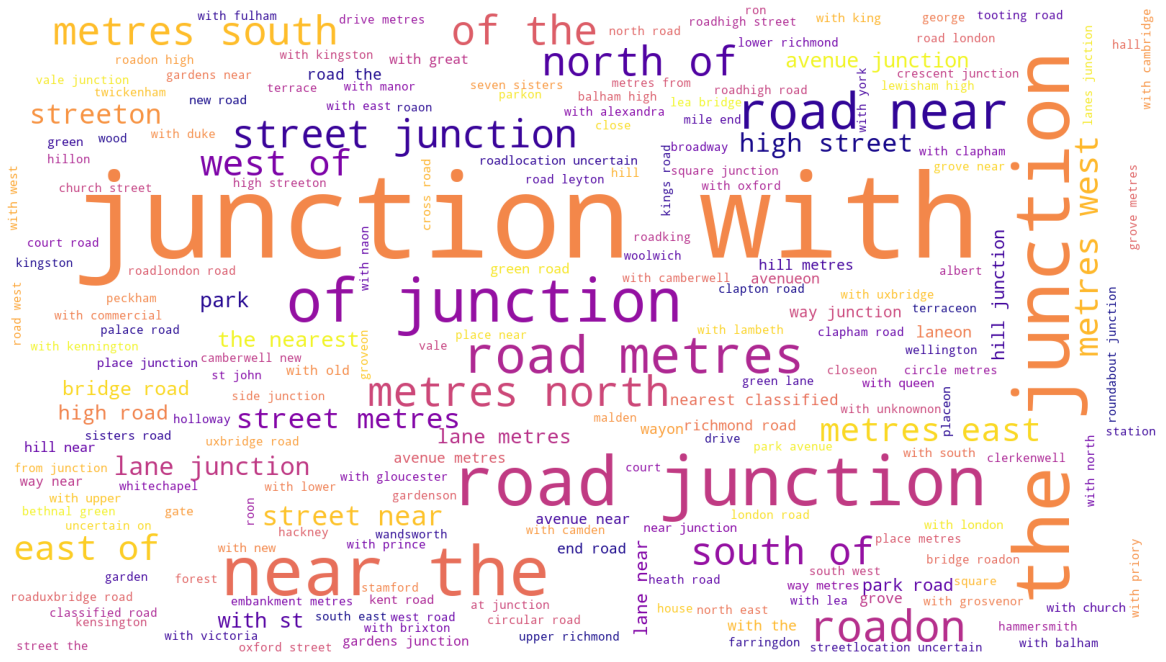

In [38]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [39]:
# tokenising the text data

In [40]:
tokenised_sentence = sent_tokenize(all_location)

# Check the result.
print(tokenised_sentence)

['on whitechapel high street near the junction with old castle streon great west road near the junction with great south west road north ofon upper richmond road near the junction with priory laneon the mall 50 metres west of the junction with spring gardenson new king street near the junction with evelyn streeton stanley avenue near the junction with whalebone lane southon kingston road london sw19 near the junction with church laneon kingston bypass 200 metres north of the junction with coombe lon campbell road near the junction with bow road londonon eardley road near the junction with mitcham laneon crowndale road nw1 58 metres east of the junction with camdenon kensington road 20 metres west of the junction with palace avenueon kings road near the junction with oakly streeton hove gardens near the junction with naon warren road near the junction with windsor driveon horn lane 20 metres north of the junction with shalimar gardenon lavender sweep near the junction with lavender hill

In [41]:
# Tokenise the text data.
tokenised_word = word_tokenize(all_location)

# Check the result.
print(tokenised_word)

['on', 'whitechapel', 'high', 'street', 'near', 'the', 'junction', 'with', 'old', 'castle', 'streon', 'great', 'west', 'road', 'near', 'the', 'junction', 'with', 'great', 'south', 'west', 'road', 'north', 'ofon', 'upper', 'richmond', 'road', 'near', 'the', 'junction', 'with', 'priory', 'laneon', 'the', 'mall', '50', 'metres', 'west', 'of', 'the', 'junction', 'with', 'spring', 'gardenson', 'new', 'king', 'street', 'near', 'the', 'junction', 'with', 'evelyn', 'streeton', 'stanley', 'avenue', 'near', 'the', 'junction', 'with', 'whalebone', 'lane', 'southon', 'kingston', 'road', 'london', 'sw19', 'near', 'the', 'junction', 'with', 'church', 'laneon', 'kingston', 'bypass', '200', 'metres', 'north', 'of', 'the', 'junction', 'with', 'coombe', 'lon', 'campbell', 'road', 'near', 'the', 'junction', 'with', 'bow', 'road', 'londonon', 'eardley', 'road', 'near', 'the', 'junction', 'with', 'mitcham', 'laneon', 'crowndale', 'road', 'nw1', '58', 'metres', 'east', 'of', 'the', 'junction', 'with', 'camd

In [42]:
# Create a frequency distribution object.
freq_dist_of_words = FreqDist(tokenised_word)

# Show the five most common elements in the data set.
freq_dist_of_words.most_common(10)

[('junction', 11898),
 ('with', 11853),
 ('road', 6887),
 ('the', 4234),
 ('of', 3189),
 ('metres', 3156),
 ('near', 2945),
 ('street', 2125),
 ('roadon', 1292),
 ('north', 1159)]

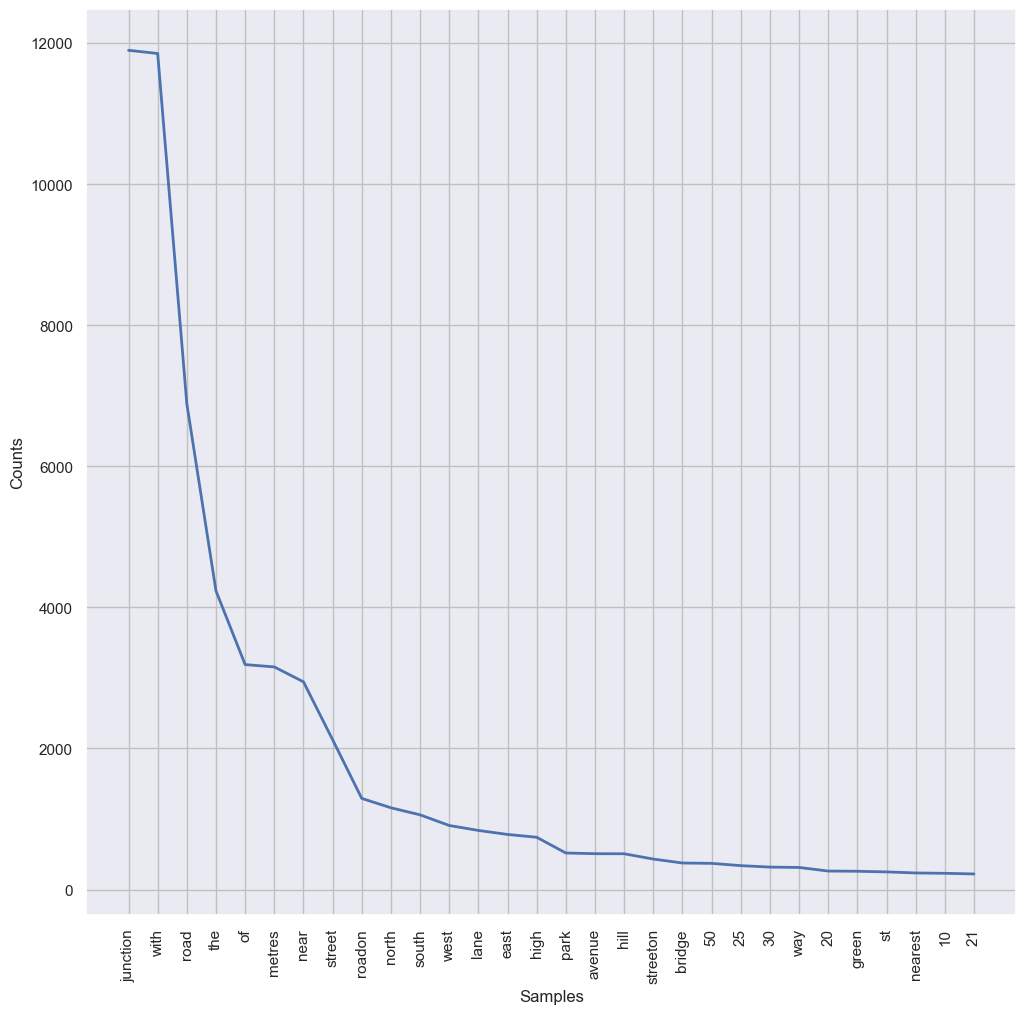

In [43]:
# Define the figure and axes.
fig, ax = plt.subplots(dpi=100)
fig.set_size_inches(12, 12)

# Plot the data set.
freq_dist_of_words.plot(30, cumulative=False)

# Display the result.
plt.show()

It appears that the location in which accidents commonly occur and/or reported in London are at junctions. 
Hence, one way to decrease the number of accidents would be to look into the sufficiency of infrastructures where accidents occured.